In [40]:
import warnings
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from collections import OrderedDict
from plotting import line_plot_predictions, plot_cross_val_score, cross_val_scores
from baseline_models import Baseline_previous, Baseline_average, baseline_forecasts
from sarima_models import Sarima_predictions
from data_wrangling import Results_data, Data_preparation
plt.style.use('fivethirtyeight')

In [112]:
project_type = {'project_6d8c': 'Hotel',
                'project_1074': 'Supermarket',
                'project_5526': 'Mine processing',
                'project_a1e0': 'University',
                'project_34a6': 'Office',
                'project_e871': 'Farm processing'}

## Daily

In [116]:
project_names = ['project_6d8c','project_1074','project_5526','project_a1e0','project_34a6','project_e871']
paths = ['../results/results_daily/output_'+p+'_daily' for p in project_names]
results = [Results_data(path).get_data().df for path in paths]

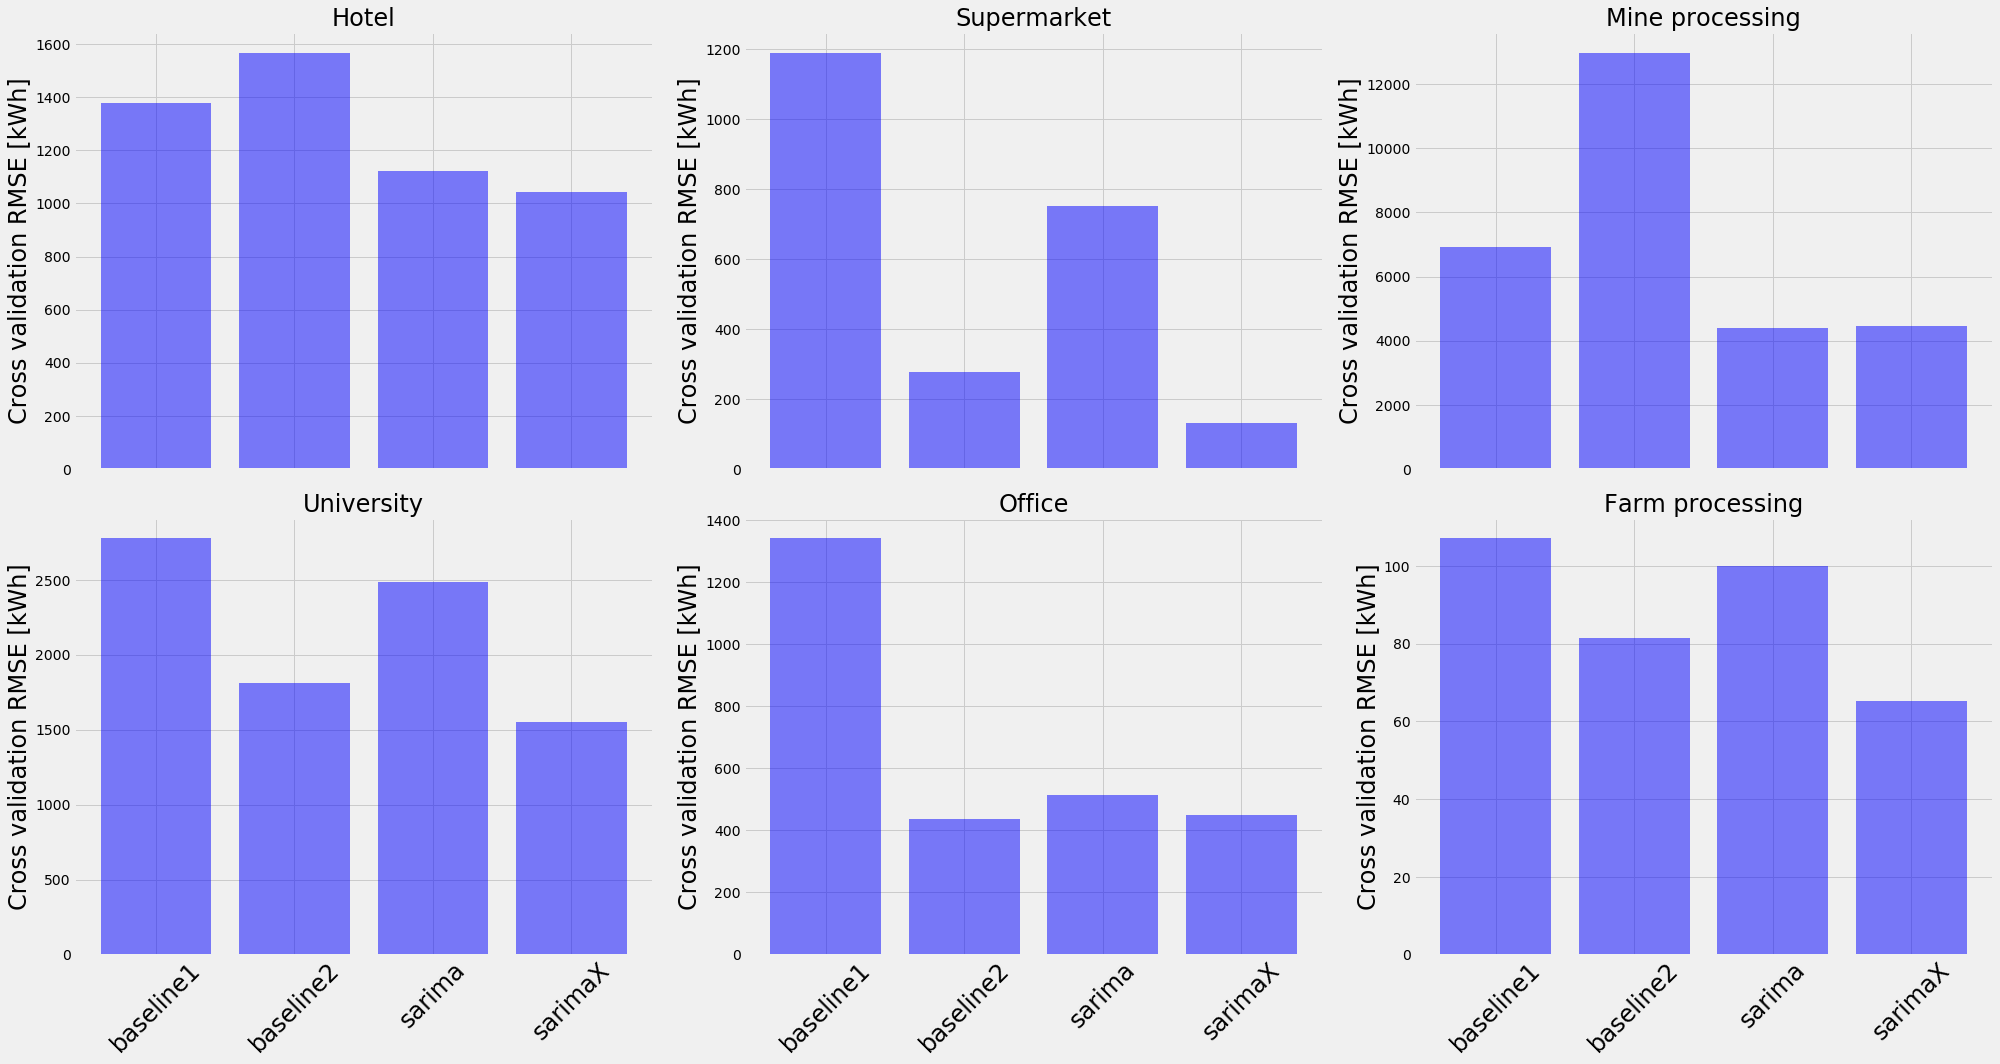

In [117]:
fig, axes = plt.subplots(2,3, figsize=(28,15),sharex=True)
font_size=24
for df, ax in zip(results, axes.ravel()):
    scores = cross_val_scores(df)
    values = [v/1000. for v in scores.values()]
    ax.bar(range(len(scores)),values, color='b', alpha=0.5,align='center')
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.keys(),rotation=45,fontsize=font_size)
    ax.set_ylabel('Cross validation RMSE [kWh]', fontsize=font_size)
    ax.set_title(project_type[df['project'].values[0]],fontsize=font_size)
plt.tight_layout()
plt.show()

## Hourly

In [120]:
project_names = ['project_6d8c','project_1074','project_5526','project_a1e0','project_34a6','project_e871']
paths = ['../results/results_hourly/output_'+p+'_hourly' for p in project_names]
results = [Results_data(path).get_data().df for path in paths]

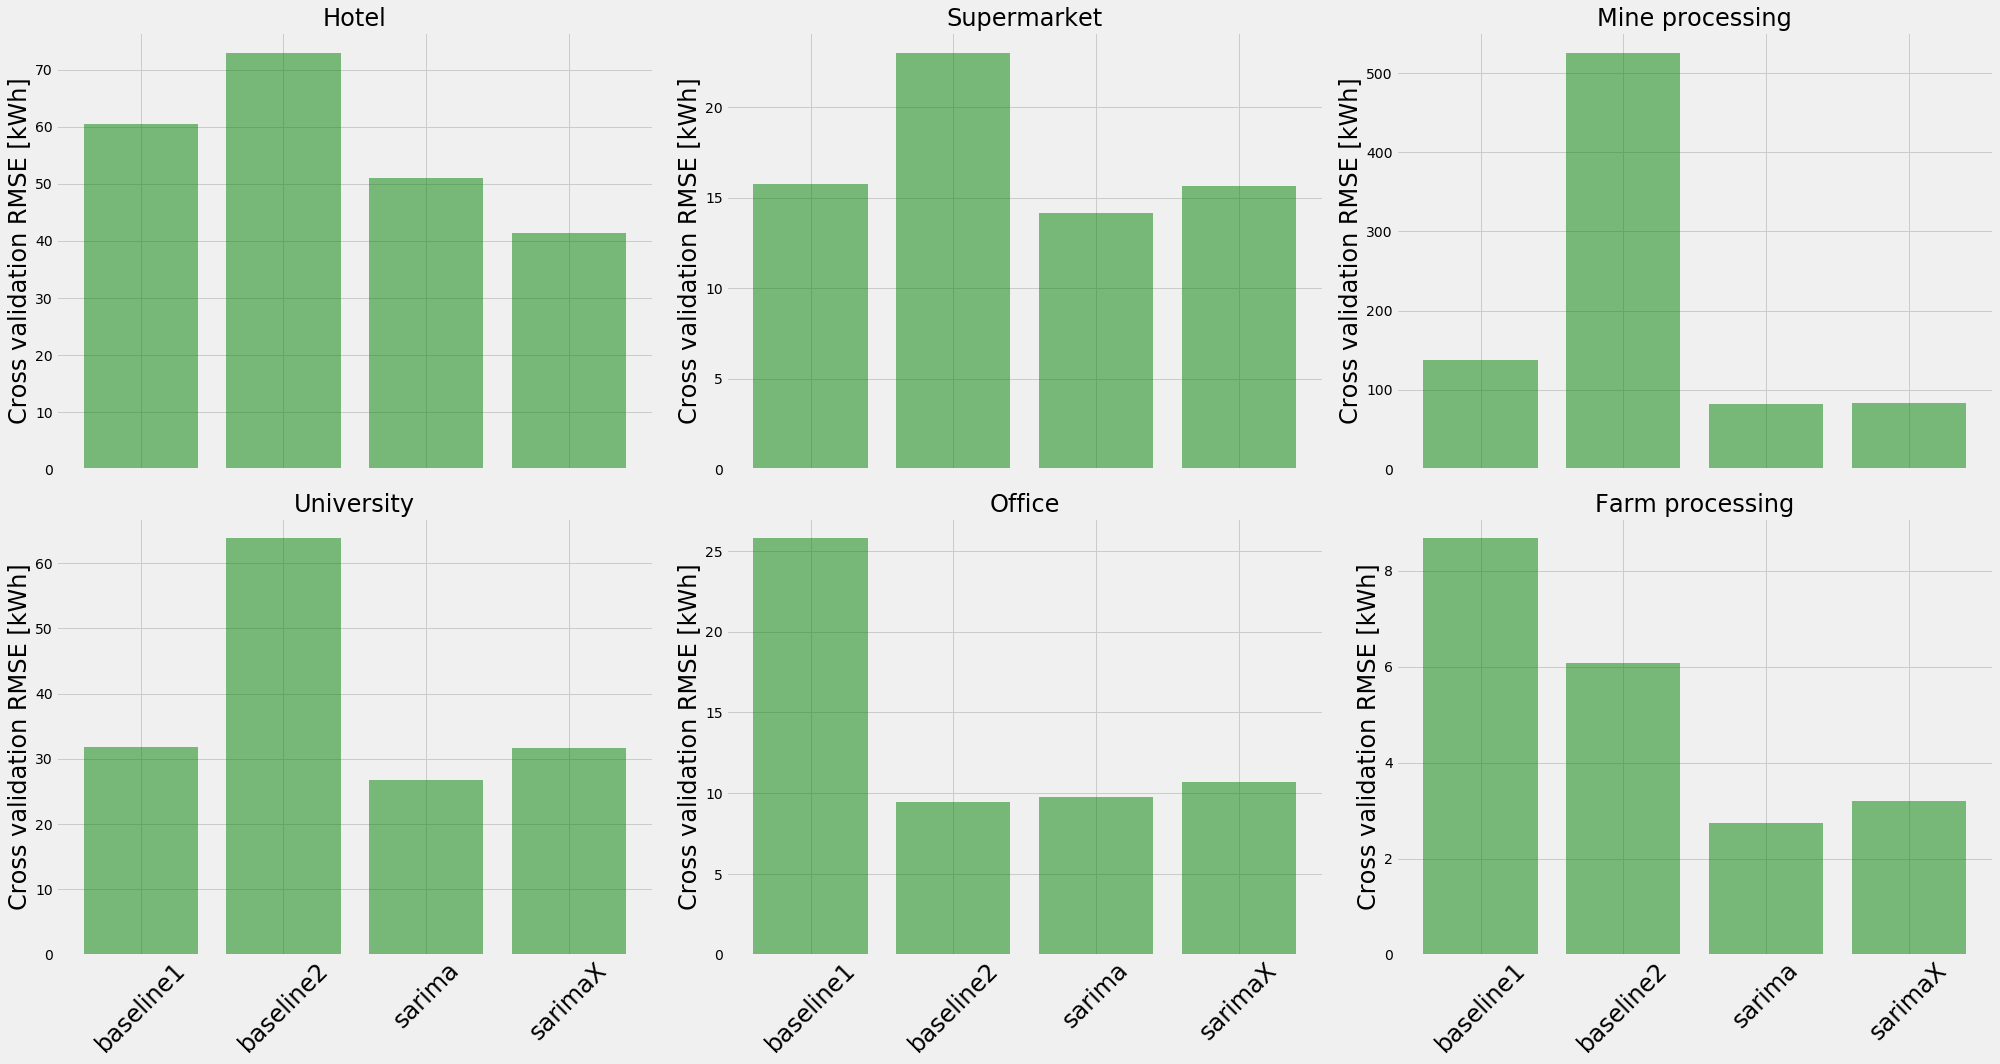

In [122]:
fig, axes = plt.subplots(2,3, figsize=(28,15),sharex=True)
font_size=24
for df, ax in zip(results, axes.ravel()):
    scores = cross_val_scores(df,var=False)
    values = [v/1000. for v in scores.values()]
    ax.bar(range(len(scores)),values, color='g', alpha=0.5,align='center')
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.keys(),rotation=45,fontsize=font_size)
    ax.set_ylabel('Cross validation RMSE [kWh]', fontsize=font_size)
    ax.set_title(project_type[df['project'].values[0]],fontsize=font_size)
plt.tight_layout()
plt.show()

project_6d8c_daily_fbeta.csv


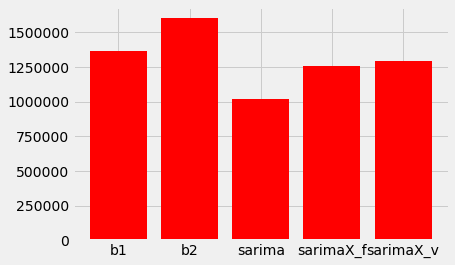

In [22]:
df, res = get_test_results('project_6d8c','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), color='r', align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_34a6_daily_fbeta.csv


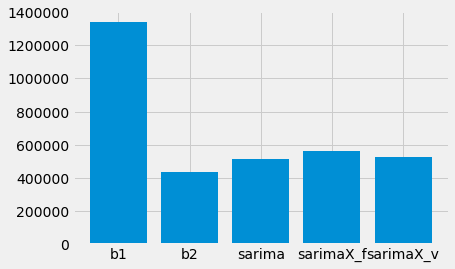

In [8]:
df, res = get_results('project_34a6','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_34a6_daily_fbeta.csv


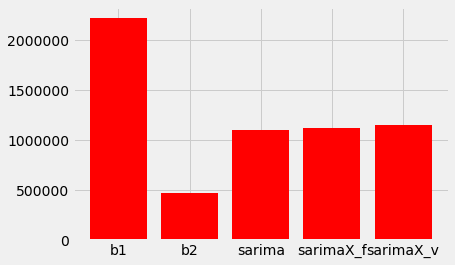

In [23]:
df, res = get_test_results('project_34a6','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), color='r',align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_1074_daily_fbeta.csv


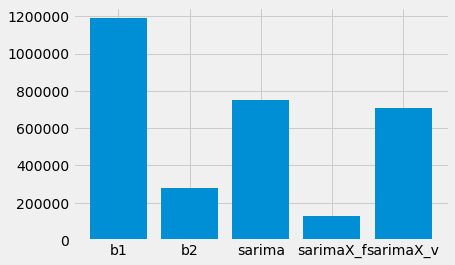

In [16]:
# Too short to be reliable
df, res = get_results('project_1074','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_5526_daily_fbeta.csv


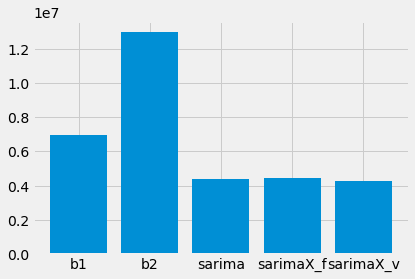

In [12]:
df, res = get_results('project_5526','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_5526_daily_fbeta.csv


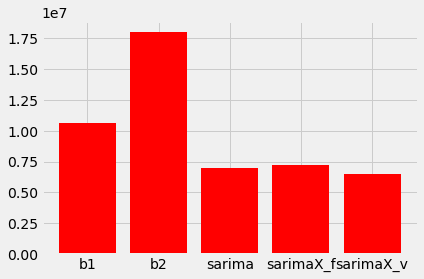

In [24]:
df, res = get_test_results('project_5526','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), color='r',align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_a1e0_daily_fbeta.csv


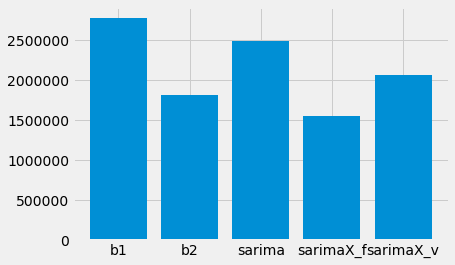

In [14]:
df, res = get_results('project_a1e0','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_a1e0_daily_fbeta.csv


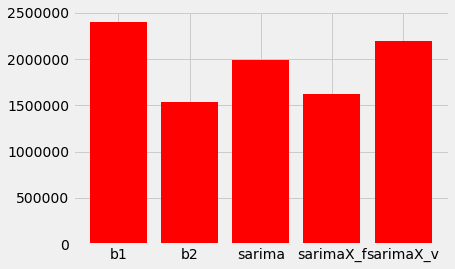

In [25]:
df, res = get_test_results('project_a1e0','daily')
plot = res
plt.bar(range(len(plot)),plot.values(),color='r', align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_e871_daily_fbeta.csv


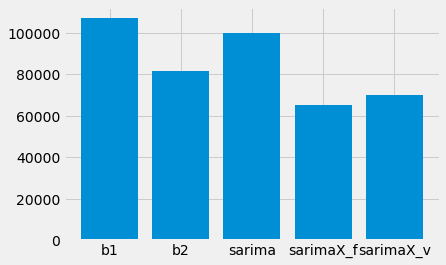

In [15]:
df, res = get_results('project_e871','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

In [44]:
df, res = get_test_results('project_e871','daily')
plot = res
plt.bar(range(len(plot)),plot.values(), color='r', align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

project_e871_daily_fbeta.csv


IOError: File output_project_e871_daily_fbeta.csv_fbeta.csv does not exist

## Hourly

In [37]:
def get_results(project_name, frequency):
    filename = 'results/output_{}_{}_fbeta.csv'.format(project_name, frequency)
    print filename
    df = Results_data(filename).get_data().df
    cross_val_scores = {}
    cross_val_scores['b1'] = df.iloc[0]['baseline_previous']
    cross_val_scores['b2'] = df.iloc[0]['baseline_averages']
    cross_val_scores['sarima'] = df.iloc[0]['sarimax']
    cross_val_scores['sarimaX_f'] = df.iloc[2]['sarimax']
#     filename = '{}_{}_vbeta.csv'.format(project_name, frequency)
#     df = Results_data(filename).get_data().df
#     cross_val_scores['sarimaX_v'] = df.iloc[2]['sarimax']
    results = OrderedDict(sorted(cross_val_scores.items(), key=lambda t: t[0]))
    return df, results
    
    

results/output_project_6d8c_hourly_fbeta.csv


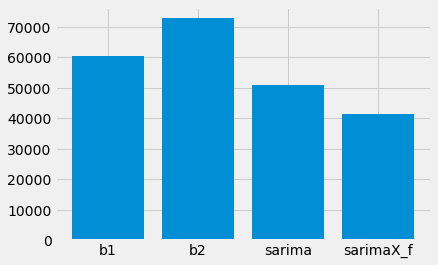

In [38]:
df, res = get_results('project_6d8c','hourly')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

results/output_project_34a6_hourly_fbeta.csv


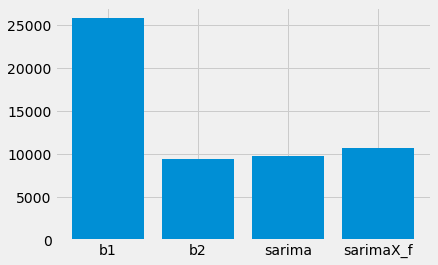

In [39]:
df, res = get_results('project_34a6','hourly')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

results/output_project_1074_hourly_fbeta.csv


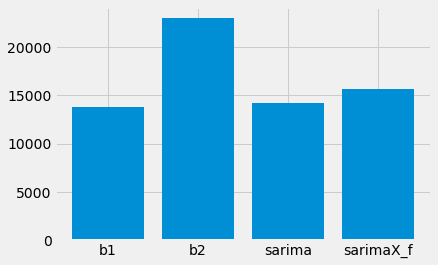

In [40]:
df, res = get_results('project_1074','hourly')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

results/output_project_5526_hourly_fbeta.csv


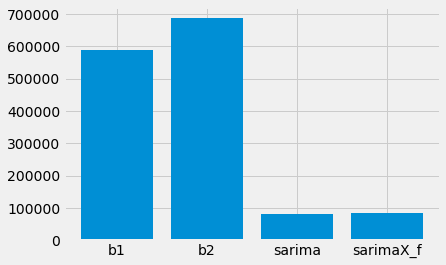

In [41]:
df, res = get_results('project_5526','hourly')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

results/output_project_a1e0_hourly_fbeta.csv


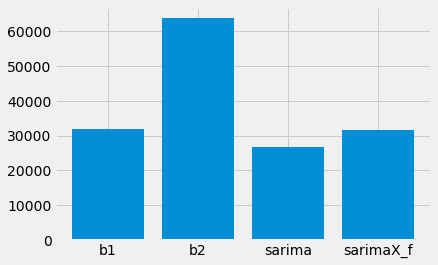

In [42]:
df, res = get_results('project_a1e0','hourly')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()

results/output_project_e871_hourly_fbeta.csv


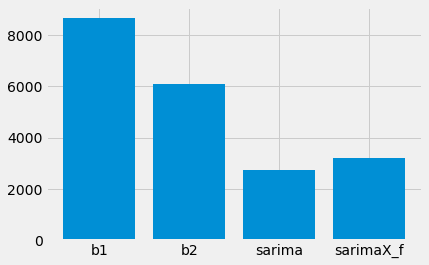

In [43]:
df, res = get_results('project_e871','hourly')
plot = res
plt.bar(range(len(plot)),plot.values(), align='center')
plt.xticks(range(len(plot)), plot.keys())

plt.show()